## Time series forecasing in Tensorflow

In [110]:
import pandas as pd
df = pd.read_csv("D:/Github/Forex-prediction-EURUSD/data/EURUSD.csv")

df.head(5)


Date      Open      High       Low     Close  Adj Close  Volume
0  2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194     0.0
1  2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194     0.0
2  2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698     0.0
3  2004-01-06  1.268907  1.280803  1.267202  1.272103   1.272103     0.0
4  2004-01-07  1.272394  1.273999  1.262499  1.264095   1.264095     0.0

## Các thao tác phân tích, xử lý và trực quan dữ liệu 

In [111]:
# Đổi cột Date sang Index
df.Date = pd.to_datetime(df.Date, dayfirst = False) 
df.set_index("Date", inplace = True)

df.head(5)

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194     0.0
2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194     0.0
2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698     0.0
2004-01-06  1.268907  1.280803  1.267202  1.272103   1.272103     0.0
2004-01-07  1.272394  1.273999  1.262499  1.264095   1.264095     0.0

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4903 entries, 2004-01-01 to 2022-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4874 non-null   float64
 1   High       4874 non-null   float64
 2   Low        4874 non-null   float64
 3   Close      4874 non-null   float64
 4   Adj Close  4874 non-null   float64
 5   Volume     4874 non-null   float64
dtypes: float64(6)
memory usage: 268.1 KB


In [113]:
eurusd_prices = pd.DataFrame(df["Open"]).rename(columns={"Open": "Price"})

eurusd_prices.head(5)

Price
Date                
2004-01-01  1.259002
2004-01-02  1.258194
2004-01-05  1.263903
2004-01-06  1.268907
2004-01-07  1.272394

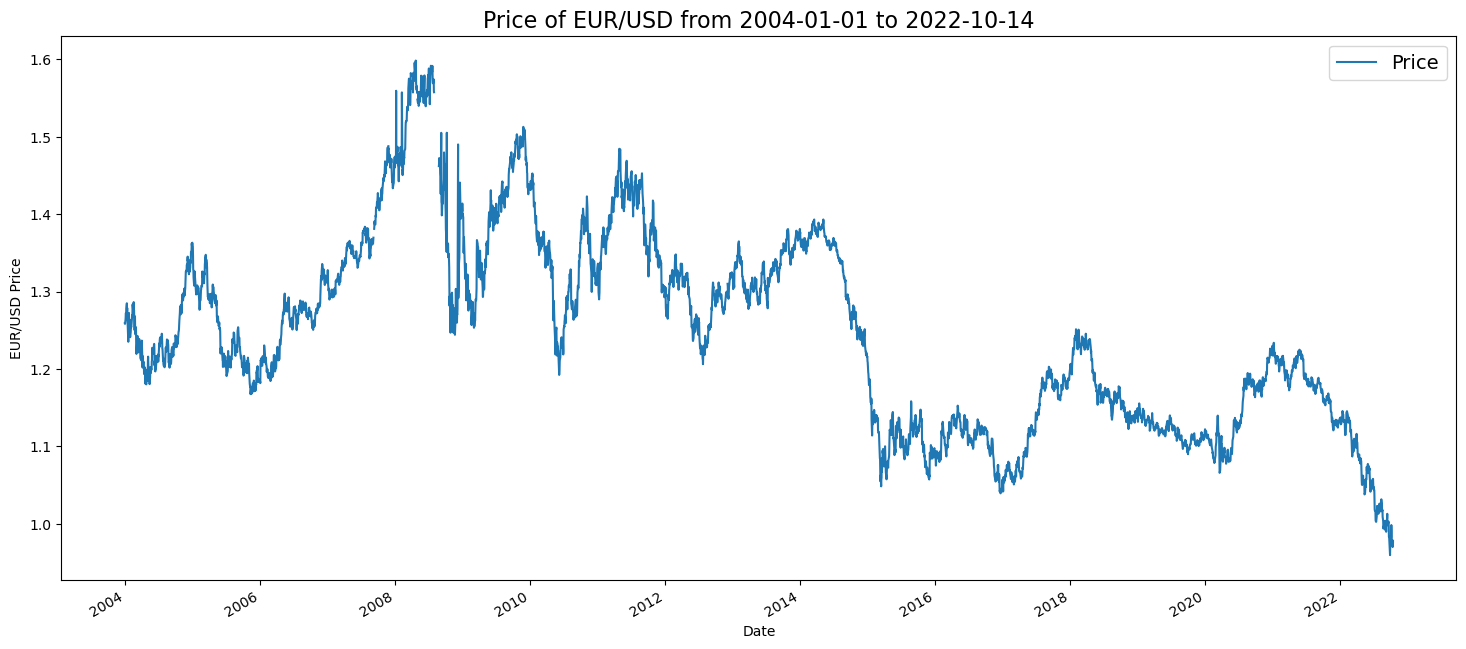

In [114]:
# Trực quan dữ liệu EUR/USD bằng đồ thị đường
import matplotlib.pyplot as plt
eurusd_prices.plot(figsize=(18,8))
plt.ylabel("EUR/USD Price")
plt.title("Price of EUR/USD from 2004-01-01 to 2022-10-14", fontsize=16)
plt.legend(fontsize=14)

In [140]:
from datetime import date
d0 = date(2022, 10, 14)
d1 = date(2004, 1, 1)
delta = abs(d0 - d1)

print("Số ngày từ 1/1/2004 -> 14/10/2022     : " + str(delta.days + 1) + " ngày")

print("")

print("Dữ liệu có trong dữ liệu hiện tại gồm : " + str(len(df)) + " ngày (Đã bao gồm giá trị Null)")

print("")

print("Dữ liệu chứa giá trị Null là          : " + str(df['Close'].isnull().sum()) + " ngày")

print("")

print("Dữ liệu thiếu                         : " + str(delta.days + 1- len(df)) + " ngày")

Số ngày từ 1/1/2004 -> 14/10/2022     : 6862 ngày

Dữ liệu có trong dữ liệu hiện tại gồm : 4903 ngày (Đã bao gồm giá trị Null)

Dữ liệu chứa giá trị Null là          : 29 ngày

Dữ liệu thiếu                         : 1959 ngày


In [157]:
time_sdata = pd.date_range("01/01/2004", periods=6862, freq="D") # 6862 là số ngày tính từ 1/1/2004 -> 14/10/2022 
df1 = pd.DataFrame(index=time_sdata)
df1["Date"] = time_sdata 
df1.set_index("Date", inplace = True)
df1.head(10)

Empty DataFrame
Columns: []
Index: [2004-01-01 00:00:00, 2004-01-02 00:00:00, 2004-01-03 00:00:00, 2004-01-04 00:00:00, 2004-01-05 00:00:00, 2004-01-06 00:00:00, 2004-01-07 00:00:00, 2004-01-08 00:00:00, 2004-01-09 00:00:00, 2004-01-10 00:00:00]

In [211]:
df1["Open"] = ['NaN']*len(df1)
df1["High"] = ['NaN']*len(df1)
df1["Low"] = ['NaN']*len(df1)
df1["Close"] = ['NaN']*len(df1)
df1["Adj Close"] = ['NaN']*len(df1)
df1["Volume"] = ['NaN']*len(df1)

In [218]:
df1[:][0:1]

Open High Low Close Adj Close Volume  Low Close
Date                                                      
2004-01-01  NaN  NaN       NaN       NaN    NaN  NaN   NaN

In [222]:
df1.index[1]

Timestamp('2004-01-02 00:00:00')

In [219]:
k = 0
for i in range(len(df)):
    for j in range(k, i):
        if(df1.index[i] == df.index[j]):
            df1[:][i:i+1] = df[:][j:j+1]
            k = i

df1

IndexError: single positional indexer is out-of-bounds

In [117]:
# Xử lý các giá trị Null 

print("Trước: --------------------------------")

print(df.isnull().sum())

print("")
print("Sau  : --------------------------------")
df1 = df.interpolate()

(df1.isnull().sum())

Trước: --------------------------------
Open         29
High         29
Low          29
Close        29
Adj Close    29
Volume       29
dtype: int64

Sau  : --------------------------------


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [118]:
eurusd_prices1 = pd.DataFrame(df["Open"]).rename(columns={"Open": "Price"})

eurusd_prices1.head(5)

Price
Date                
2004-01-01  1.259002
2004-01-02  1.258194
2004-01-05  1.263903
2004-01-06  1.268907
2004-01-07  1.272394

In [119]:
eurusd_prices1.isnull().sum()

Price    29
dtype: int64

In [120]:
eurusd_prices1 = eurusd_prices1.interpolate()

eurusd_prices1.isnull().sum()

Price    0
dtype: int64

In [121]:
eurusd_prices.isnull().sum()

Price    29
dtype: int64

In [122]:
print(eurusd_prices[eurusd_prices[:] == 'null'])

            Price
Date             
2004-01-01    NaN
2004-01-02    NaN
2004-01-05    NaN
2004-01-06    NaN
2004-01-07    NaN
...           ...
2022-10-11    NaN
2022-10-12    NaN
2022-10-13    NaN
2022-10-14    NaN
2022-10-14    NaN

[4903 rows x 1 columns]


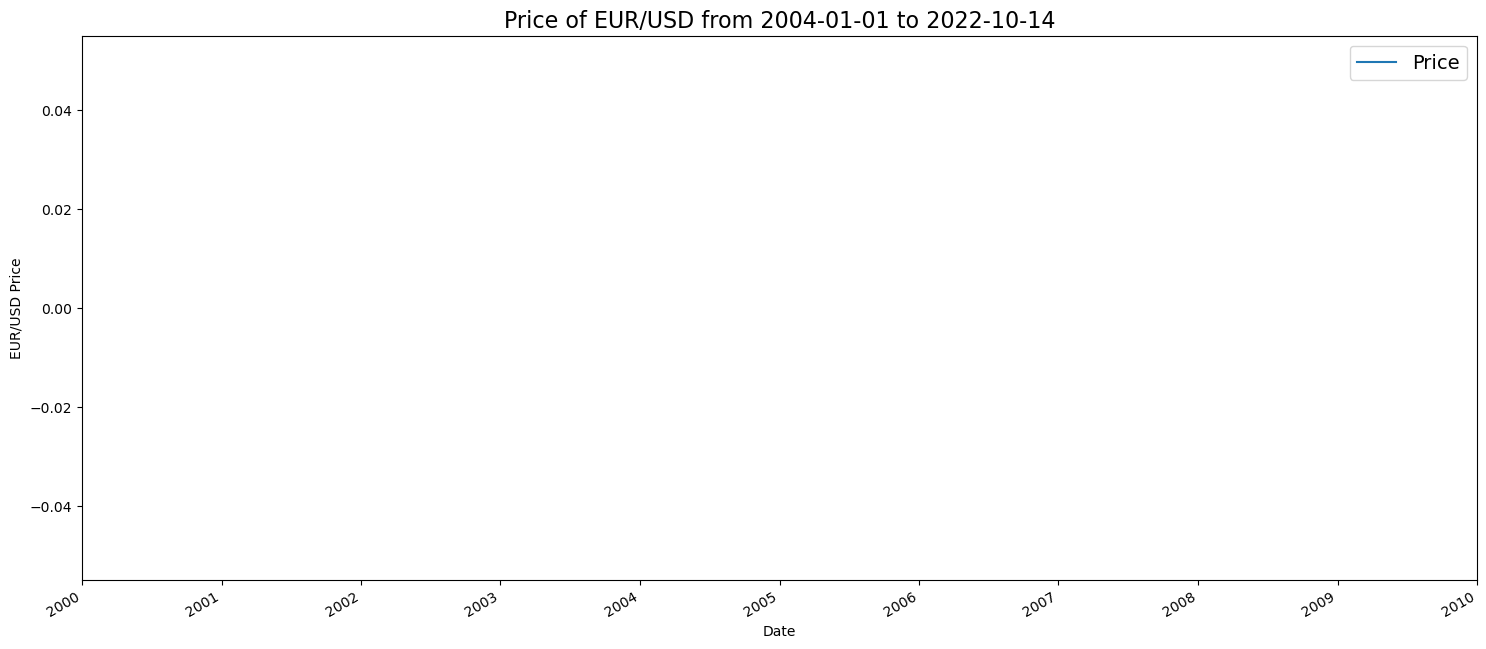

In [123]:
# Trực quan dữ liệu EUR/USD bằng đồ thị đường
import matplotlib.pyplot as plt
eurusd_prices1[eurusd_prices[:] == 'NaN'].plot(figsize=(18,8))
plt.ylabel("EUR/USD Price")
plt.title("Price of EUR/USD from 2004-01-01 to 2022-10-14", fontsize=16)
plt.legend(fontsize=14)